In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as MaxNLocator
import seaborn as sns
import random


In [10]:
df = pd.read_csv('../data/raw/mock_telemetry.csv')
df.head()

,timestamp,region,voltage_kV,current_A,frequency_Hz,load_mw
0,2025-05-03 00:18:49.619483,East Coast,115.230947,136.679888,59.941259,186.342413
1,2025-05-03 00:19:49.619483,South Florida,110.802747,180.295116,60.359909,710.403922
2,2025-05-03 00:20:49.619483,North Florida,113.102227,104.588285,59.873113,1344.742246
3,2025-05-03 00:21:49.619483,Central Florida,126.461690,72.148852,59.542103,1106.439713
4,2025-05-03 00:22:49.619483,Panhandle,126.040840,75.438901,60.383977,430.821643


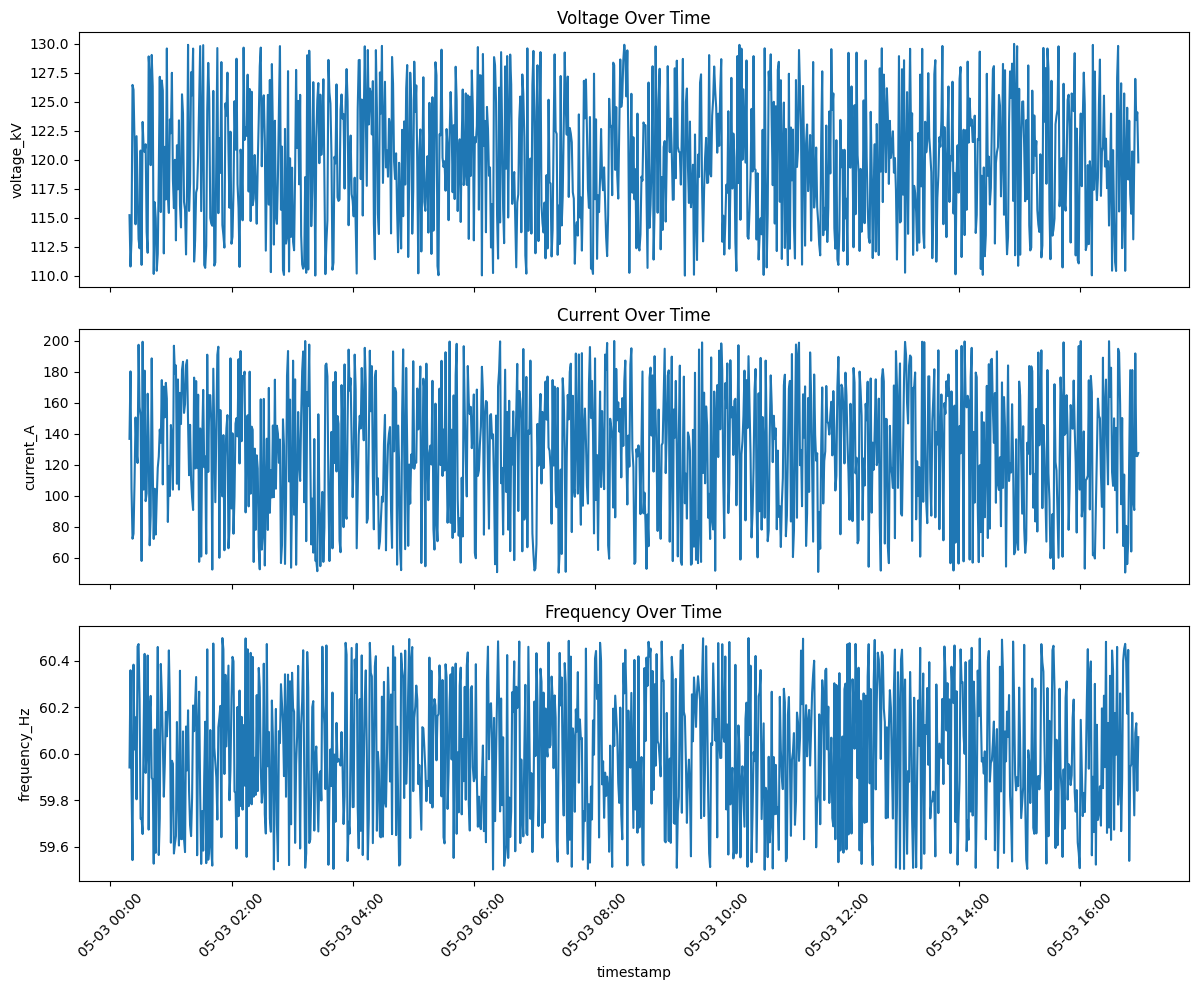

In [18]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

date_format = mdates.DateFormatter('%m-%d %H:%M')
fig, axs = plt.subplots(3, 1, figsize=(12, 10), sharex=True)

sns.lineplot(data=df, x='timestamp', y='voltage_kV', ax=axs[0])
axs[0].set_title('Voltage Over Time')

sns.lineplot(data=df, x='timestamp', y='current_A', ax=axs[1])
axs[1].set_title('Current Over Time')

sns.lineplot(data=df, x='timestamp', y='frequency_Hz', ax=axs[2])
axs[2].set_title('Frequency Over Time')

for ax in axs:
    axs[2].xaxis.set_major_formatter(date_format)
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

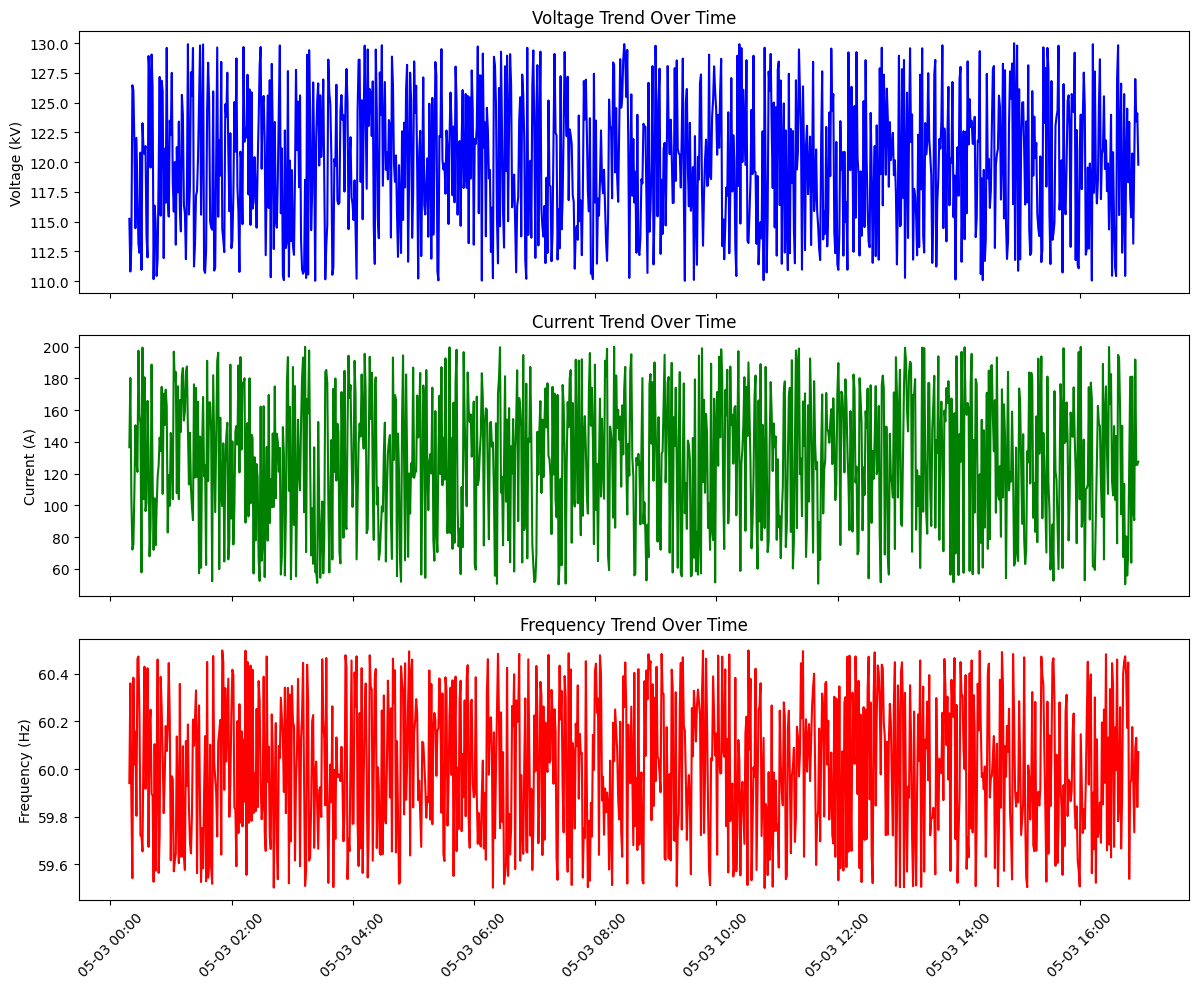

In [20]:
# Plot Voltage, Current, and Frequency trends over time

# Ensure datetime format
df['timestamp'] = pd.to_datetime(df['timestamp'])

fix, axs = plt.subplots(3, 1, figsize=(12, 10), sharex=True)

# Date formatting
date_format = mdates.DateFormatter('%m-%d %H:%M')
locator = mdates.AutoDateLocator()

# Voltage
axs[0].plot(df['timestamp'], df['voltage_kV'], color='blue', label='Voltage (kV)')
axs[0].set_title('Voltage Trend Over Time')
axs[0].set_ylabel('Voltage (kV)')

# Current
axs[1].plot(df['timestamp'], df['current_A'], color='green', label='Current (A)')
axs[1].set_title('Current Trend Over Time')
axs[1].set_ylabel('Current (A)')

# Frequency
axs[2].plot(df['timestamp'], df['frequency_Hz'], color='red', label='Frequency (Hz)')
axs[2].set_title('Frequency Trend Over Time')
axs[2].set_ylabel('Frequency (Hz)')

for ax in axs:
    ax.xaxis.set_major_formatter(date_format)
    ax.xaxis.set_major_locator(locator)
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()



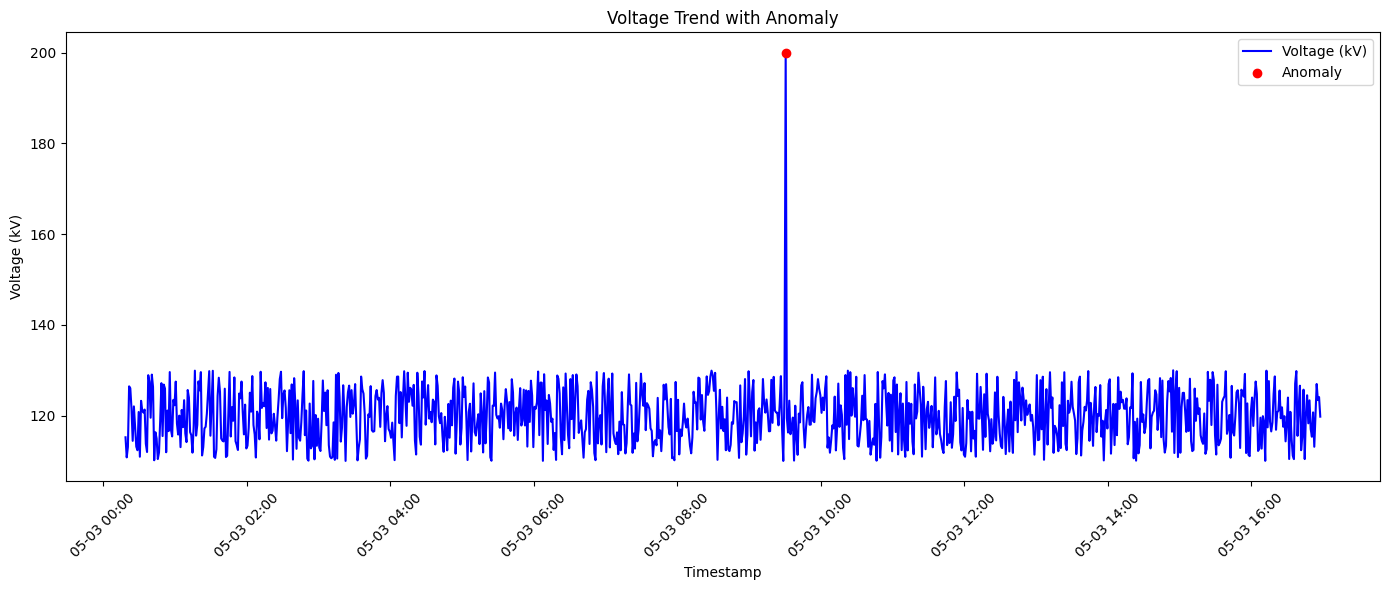

In [ ]:
# Introduce a voltage spike anomaly (e.g., voltage jumps to 200kV at a random time)
anomaly_index = random.randint(0, len(df) - 1) # Random index to insert anomaly
df.loc[anomaly_index, 'voltage_kV'] = 200 # Introduce a spike

# Re-plot voltage with the anomaly
plt.figure(figsize=(16, 6))
plt.plot(df['timestamp'], df['voltage_kV'], label='Voltage (kV)', color='blue')
plt.scatter(df['timestamp'].iloc[anomaly_index], df['voltage_kV'].iloc[anomaly_index], color='red', label='Anomaly', zorder=5)

plt.title('Voltage Trend with Anomaly')
plt.xlabel('Timestamp')
plt.ylabel('Voltage (kV)')

# Format x-axis
ax = plt.gca()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d %H:%M'))
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
plt.xticks(rotation=45)

plt.legend()
plt.tight_layout()
plt.show()

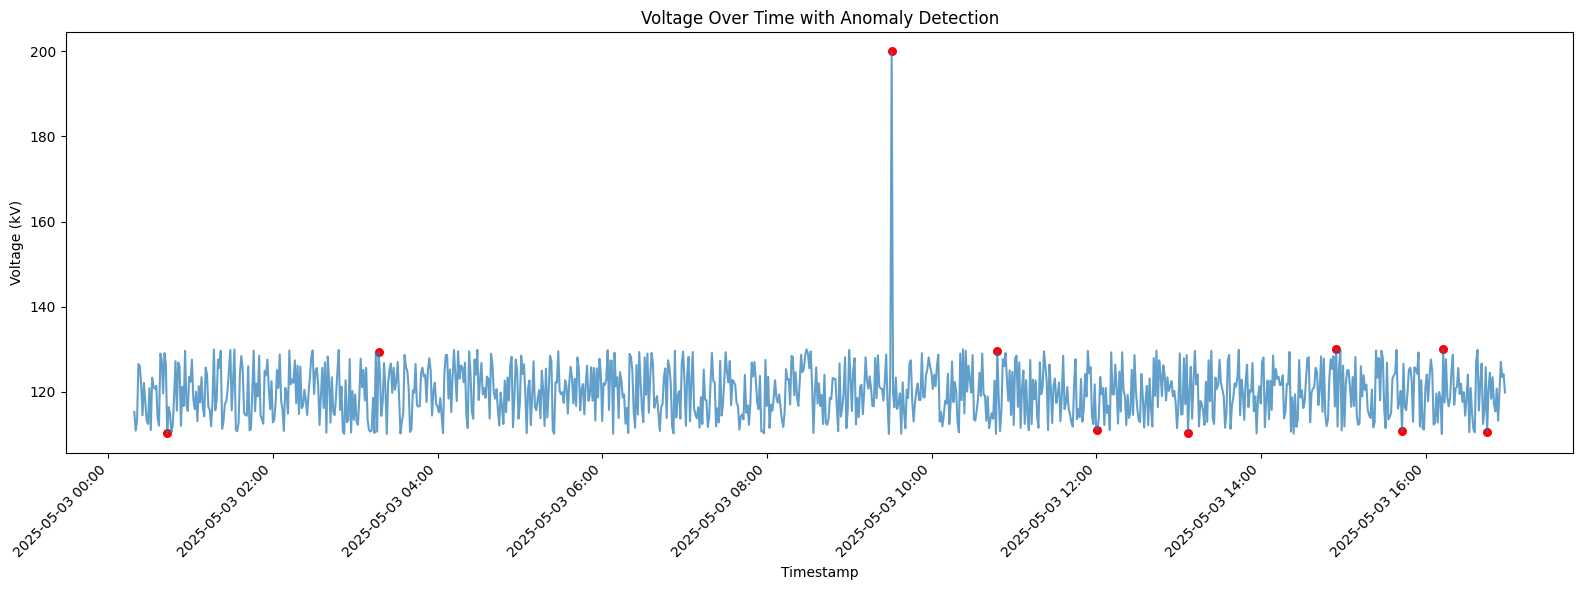

In [23]:
from sklearn.ensemble import IsolationForest
import matplotlib.dates as mdates

# Select relevant feature for anomaly detection
features = ['voltage_kV', 'current_A', 'frequency_Hz']
X = df[features]

# Fit Isolation Forest model
model = IsolationForest(n_estimators=100, contamination=0.01, random_state=42)
df['anomaly'] = model.fit_predict(X)

# Mark anomalies: -1 is anomaly, 1 is normal
df['is_anomaly'] = df['anomaly'] == -1

# Plotting voltage overtime with anomalies
fix, ax = plt.subplots(figsize=(16, 6))
ax.plot(df['timestamp'], df['voltage_kV'], label='Voltage (kV)', alpha=0.7)
ax.scatter(df[df['is_anomaly']]['timestamp'], df[df['is_anomaly']]['voltage_kV'], color='red', label='Anomaly', s=30)

locator = mdates.AutoDateLocator()
formatter = mdates.DateFormatter('%Y-%m-%d %H:%M')
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)

for label in ax.get_xticklabels():
    label.set_rotation(45)
    label.set_horizontalalignment('right')

ax.set_title('Voltage Over Time with Anomaly Detection')
ax.set_xlabel('Timestamp')
ax.set_ylabel('Voltage (kV)')

plt.tight_layout()
plt.show()